In [78]:
modisco_file = "output/nexus,gw,1,1,1,FALSE,valid,0.5,64,25,0.004,9,/deeplift/all/out/profile/wn/modisco.h5"

## Results

In [82]:
# Imports
from bpnet.modisco.files import ModiscoFile
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
mf = ModiscoFile(modisco_file)

## Numbers

In [84]:
stats = mf.stats()
stats

# seqlets assigned to patterns: 23234 / 43761 (53.0%)


{'patterns': 50,
 'clustered_seqlets': 23234,
 'metaclusters': 5,
 'all_seqlets': 43761,
 'clustered_seqlets_frac': 0.5309293663307512}

## Plot patterns

# seqlets assigned to patterns: 23234 / 43761 (53.0%)


/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


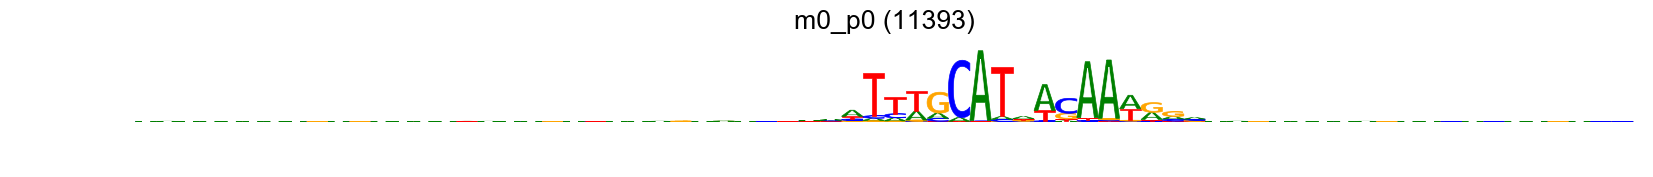

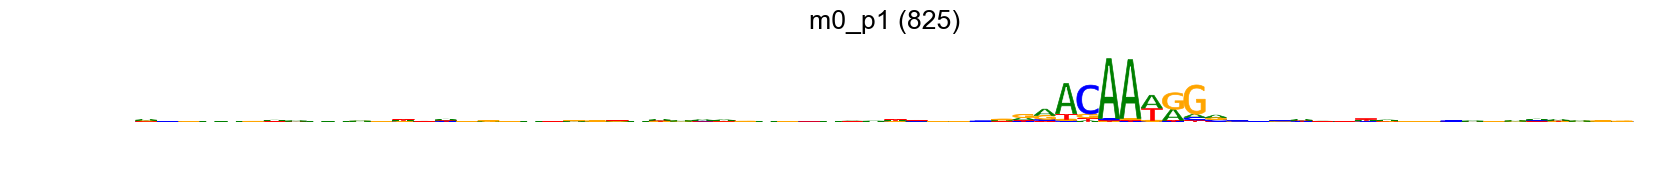

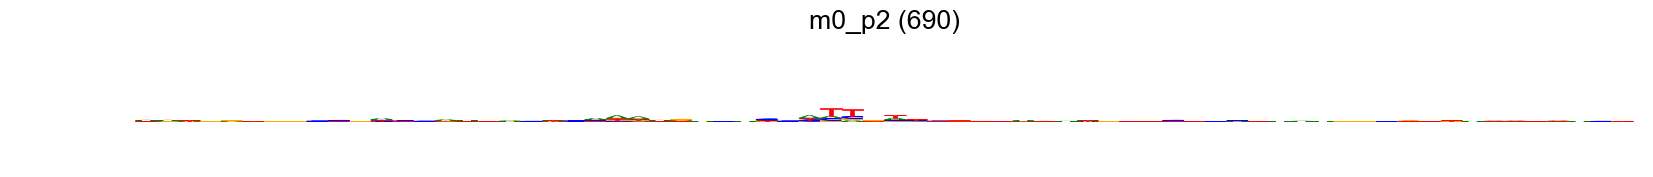

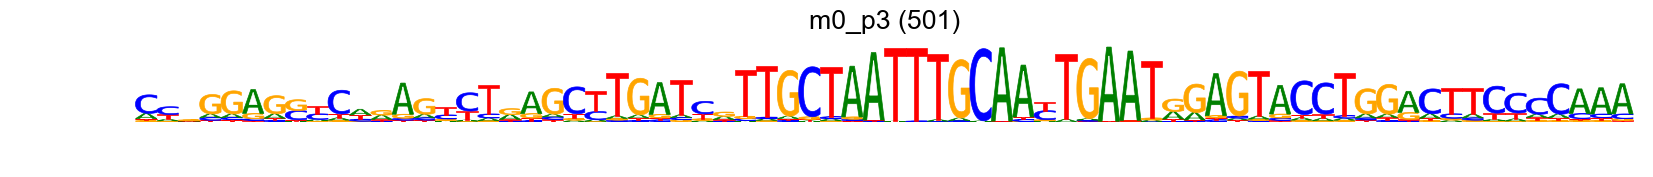

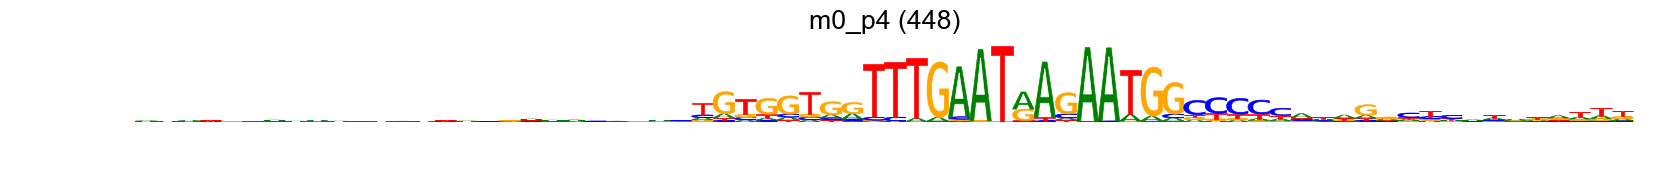

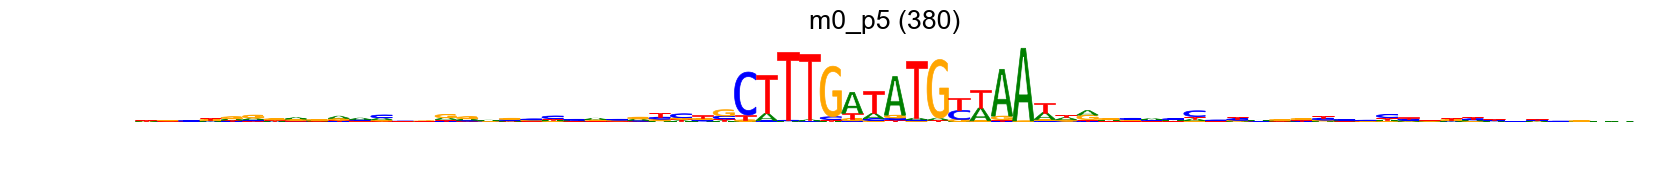

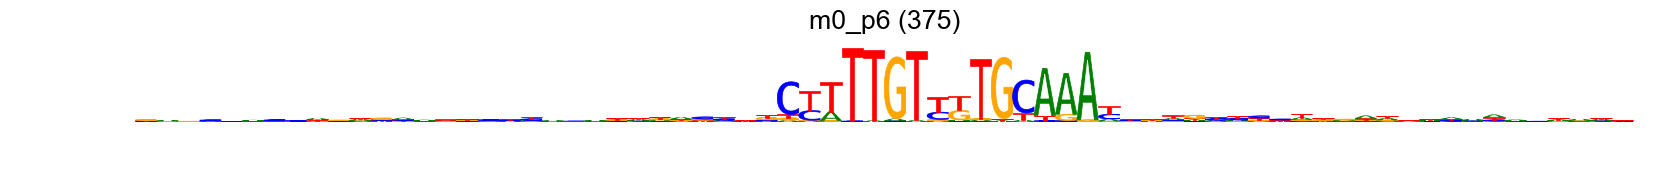

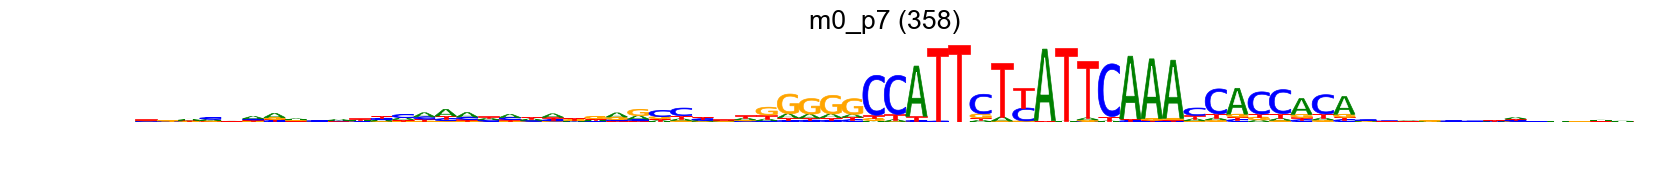

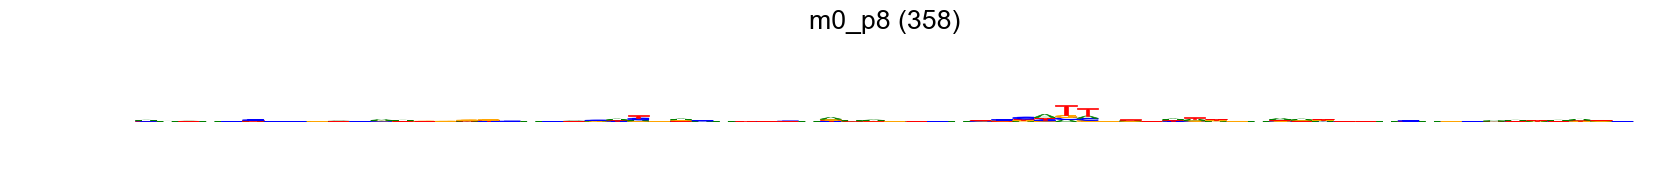

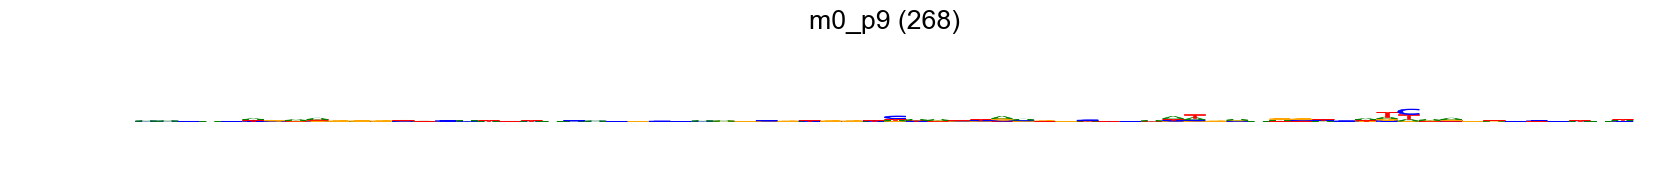

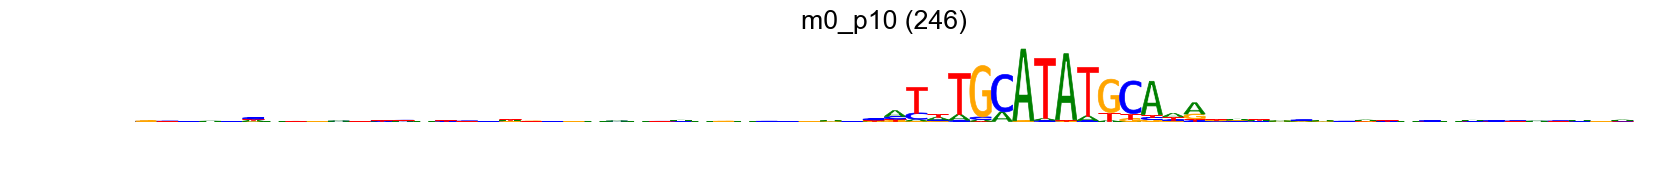

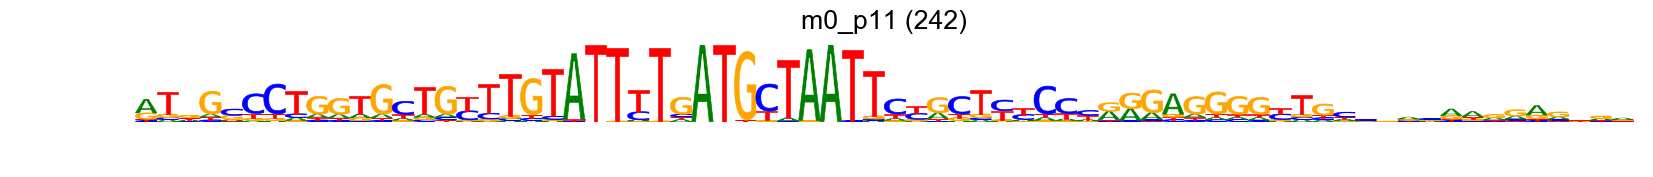

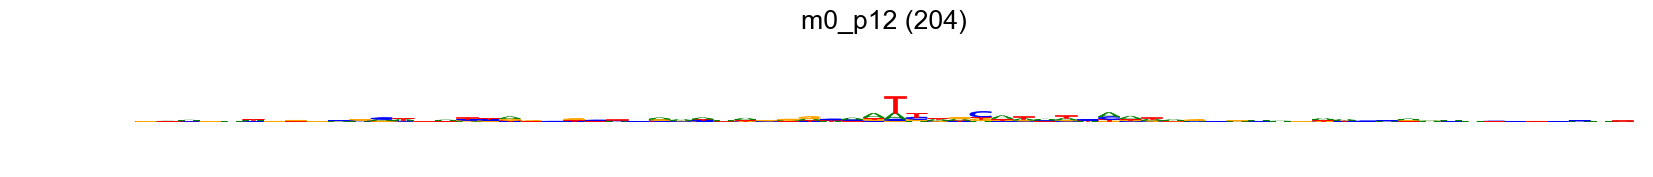

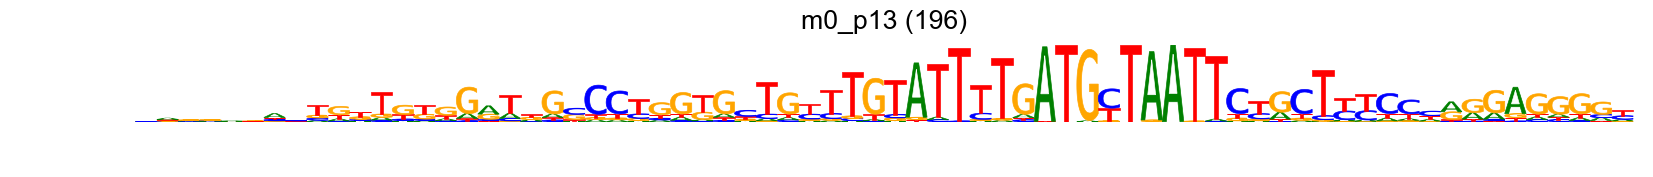

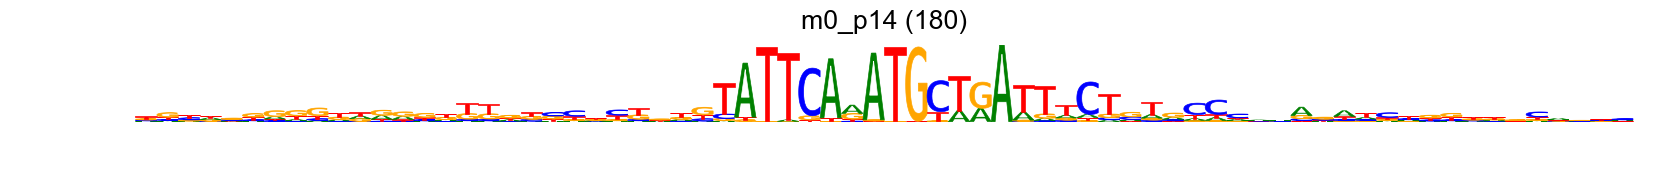

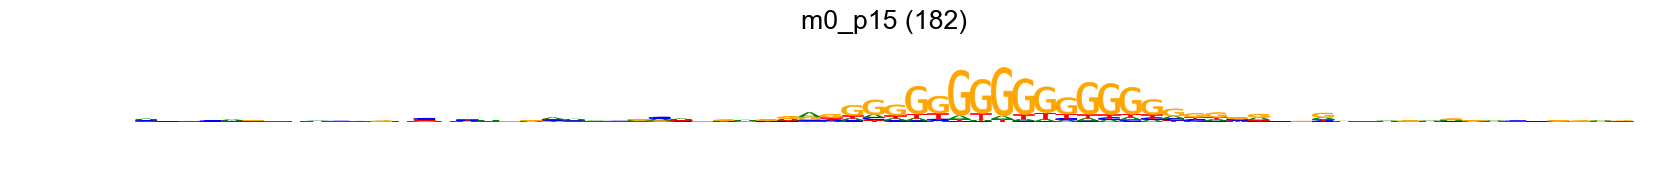

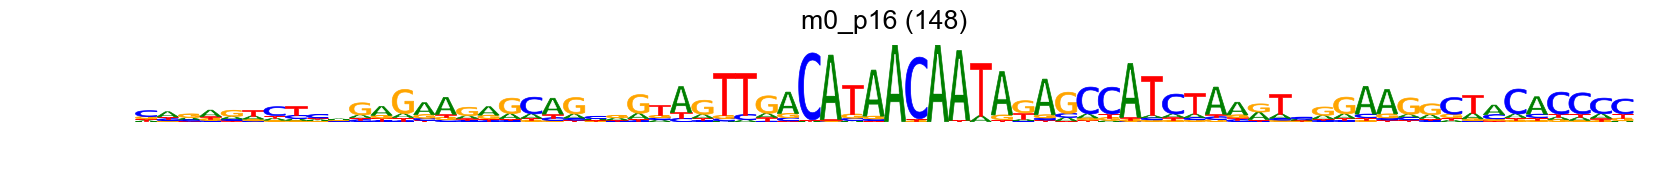

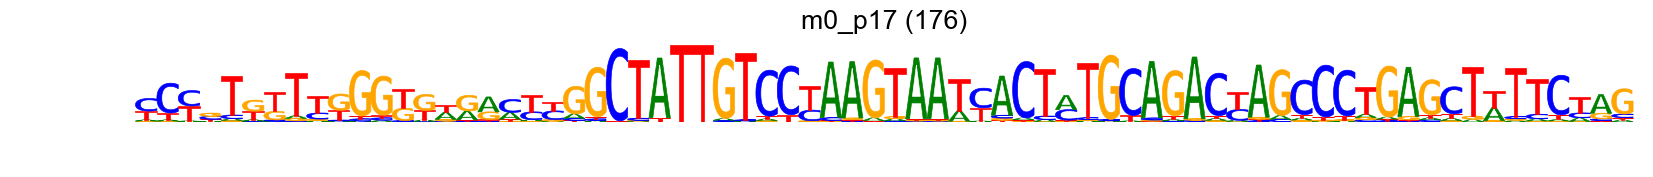

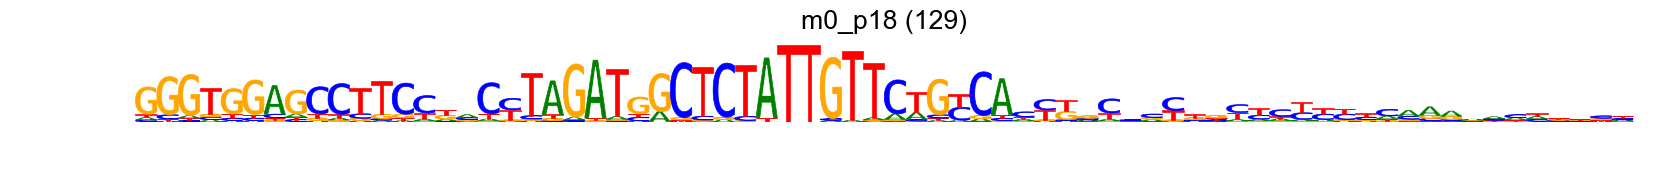

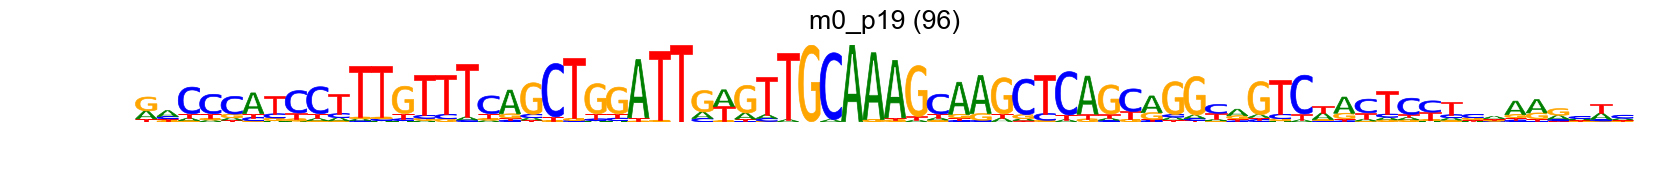

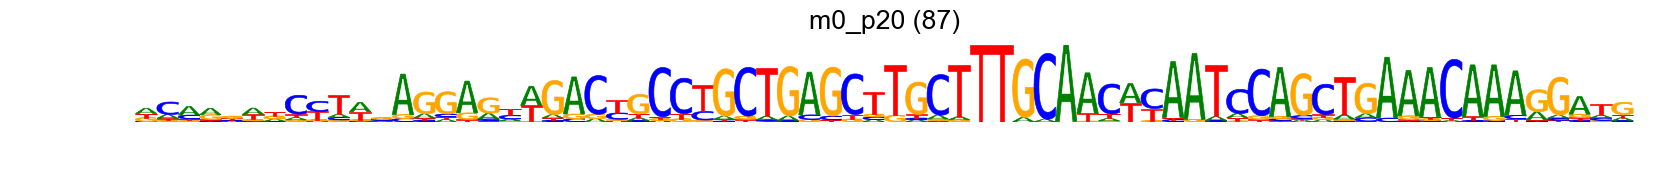

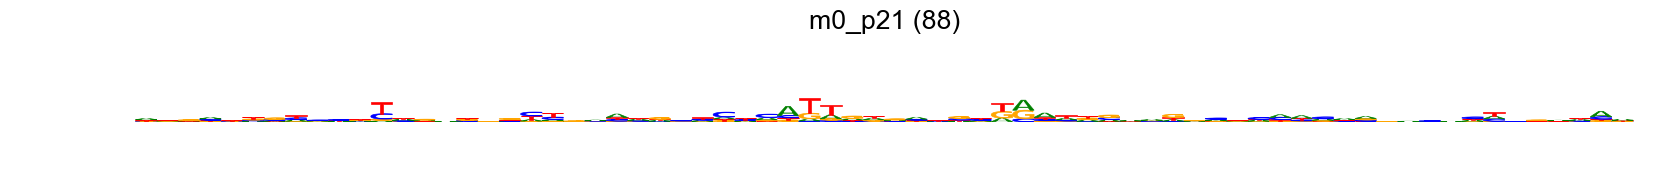

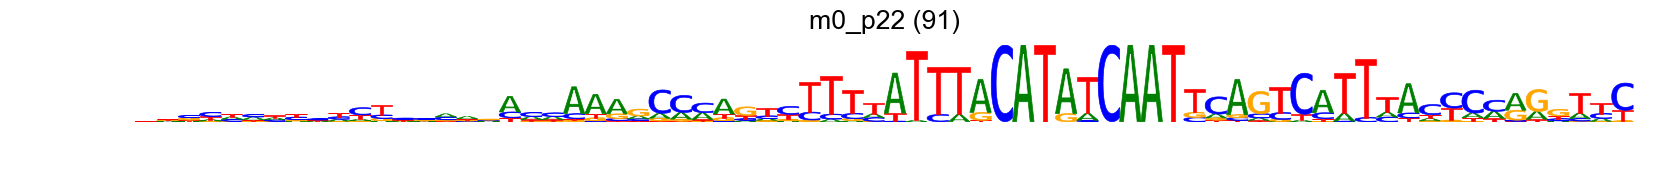

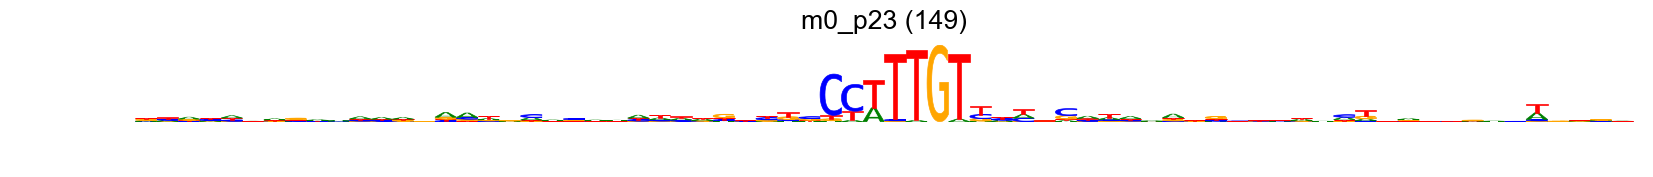

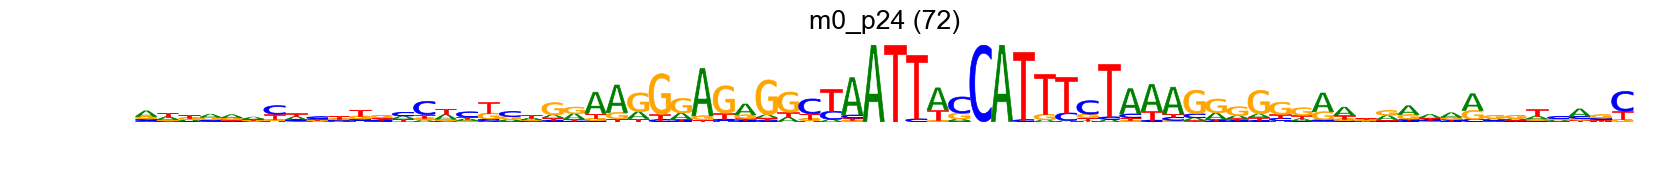

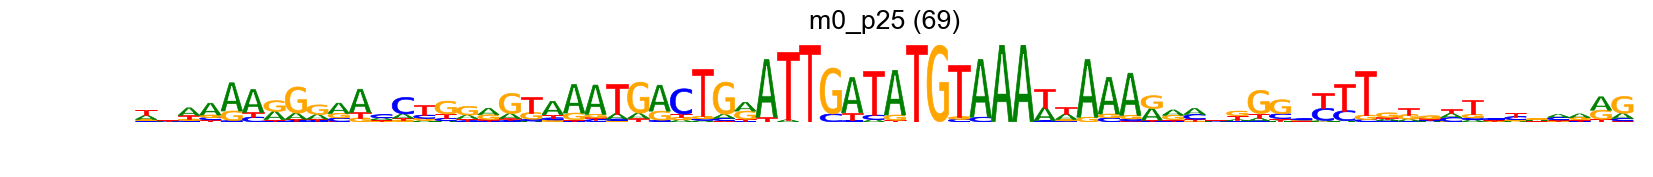

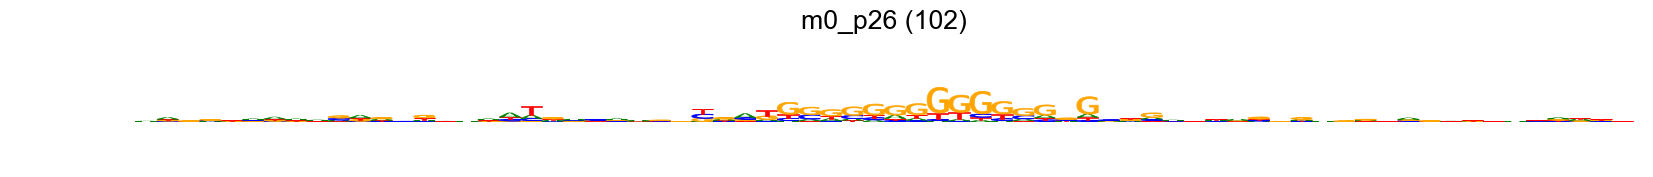

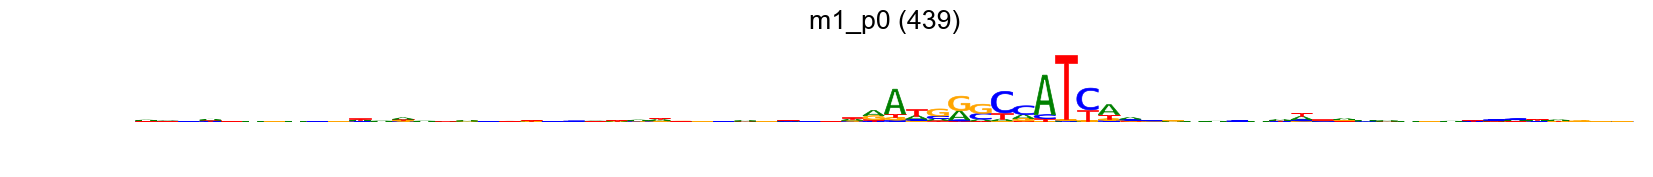

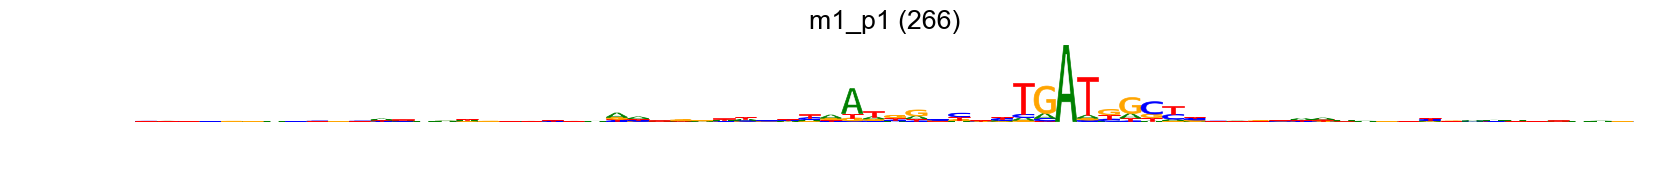

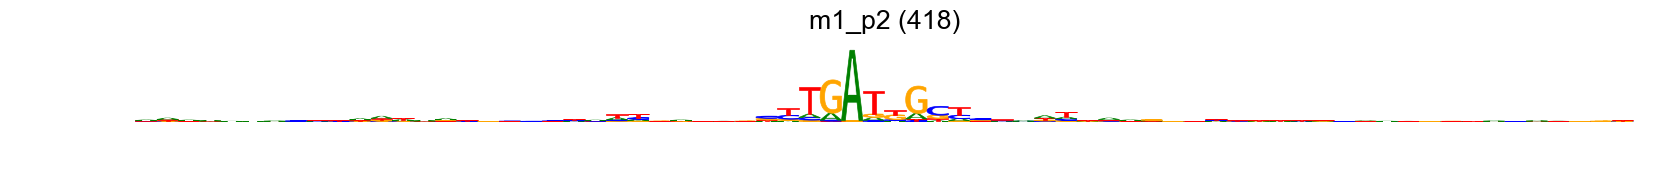

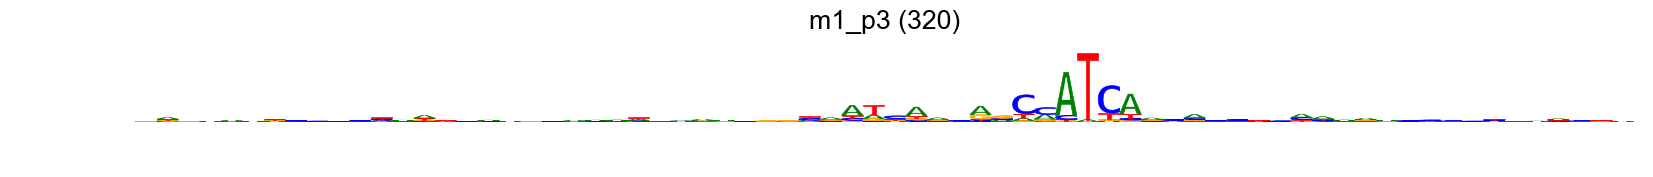

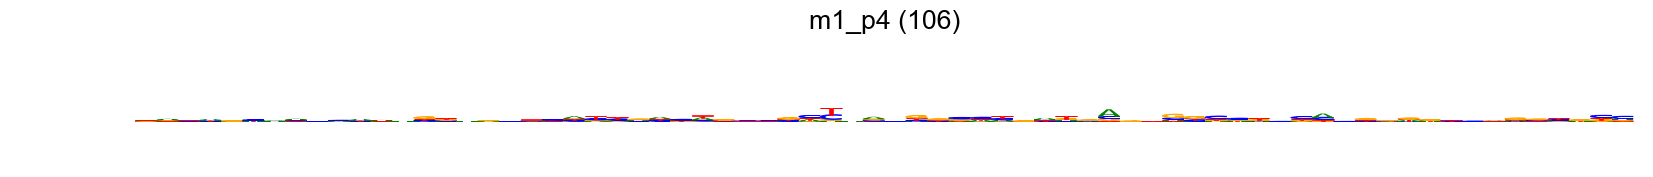

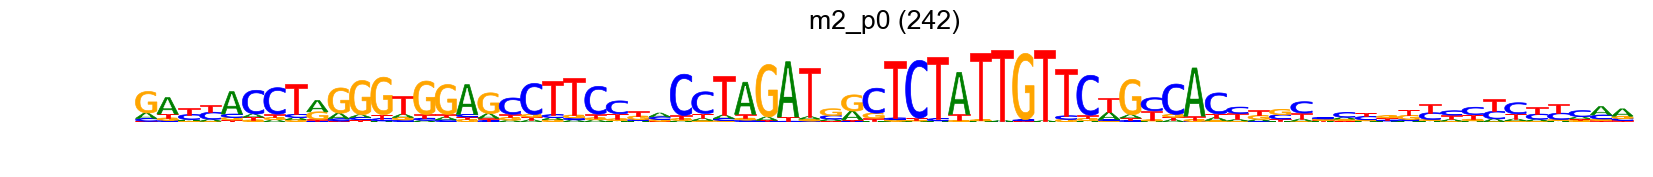

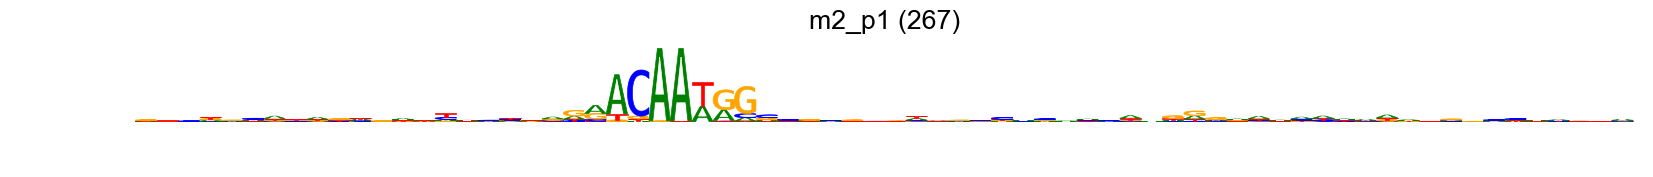

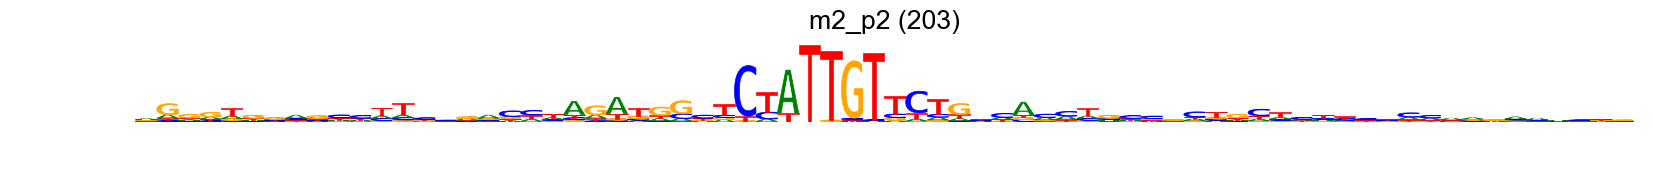

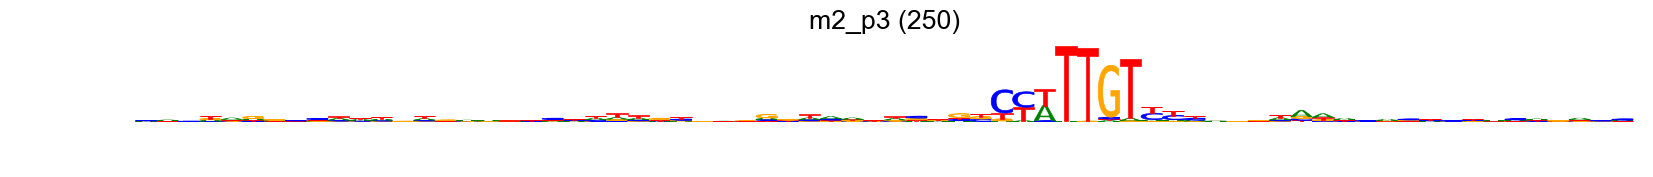

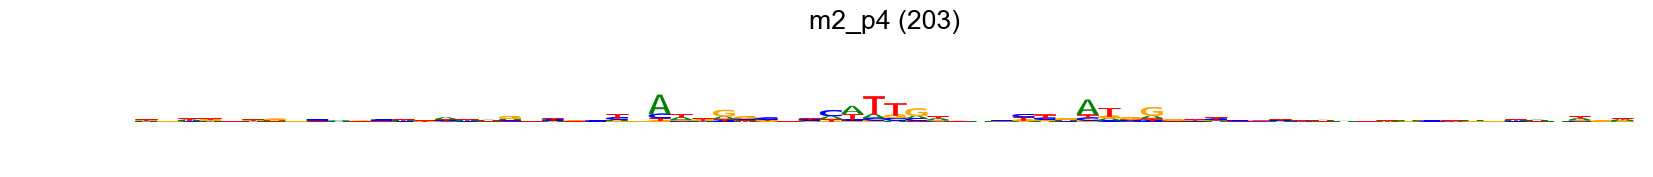

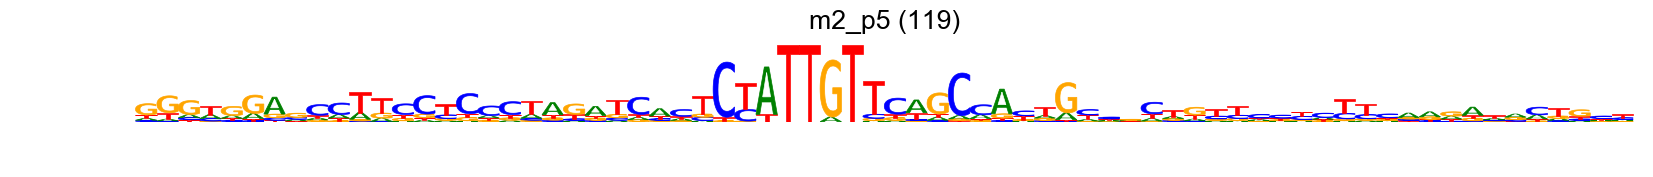

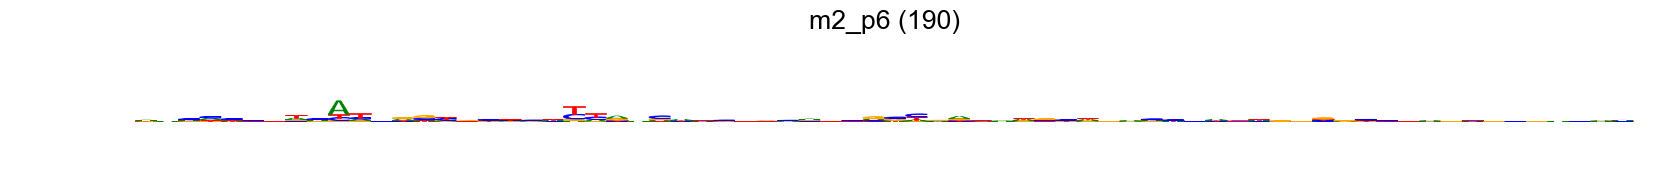

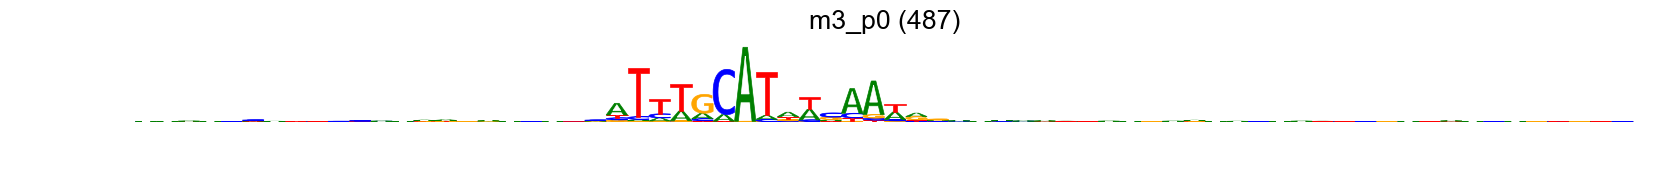

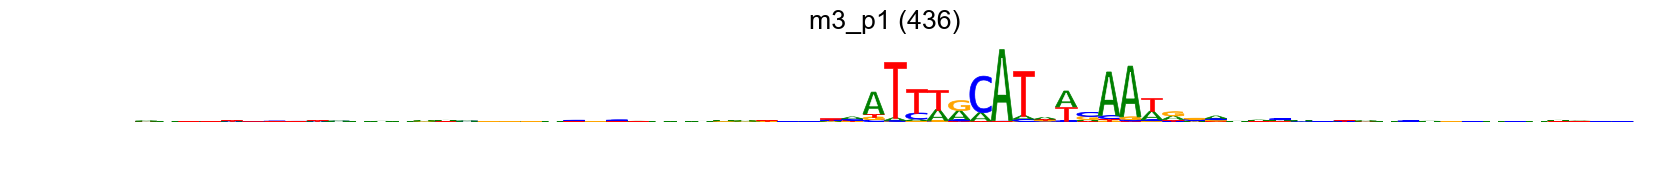

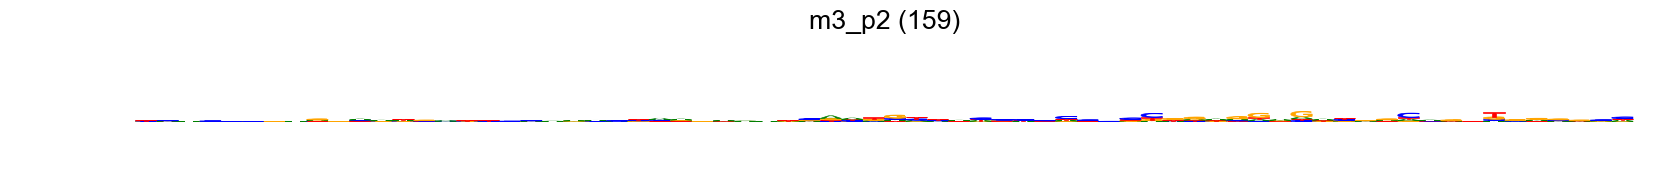

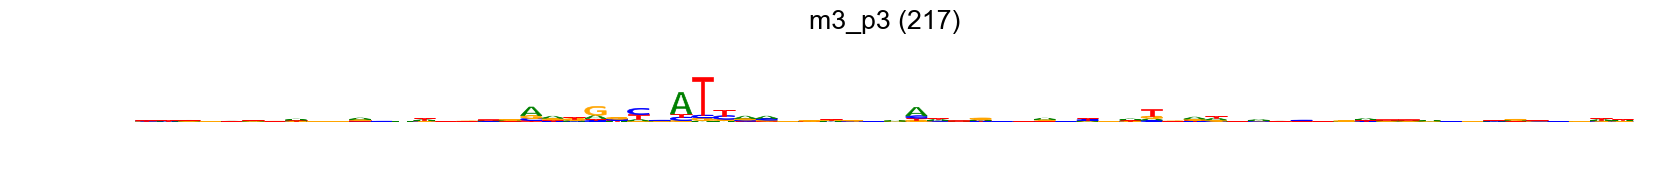

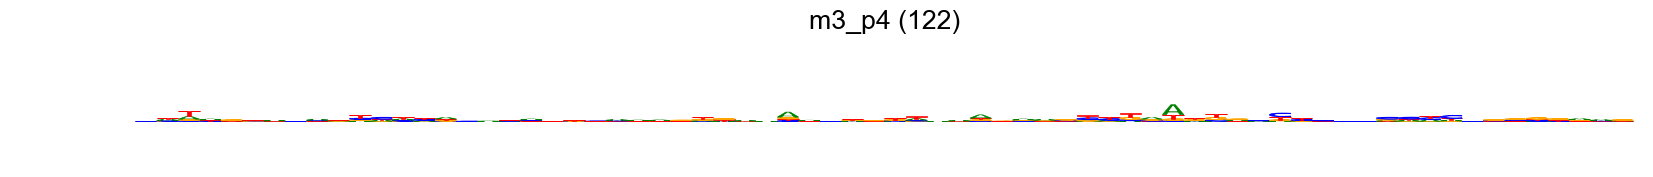

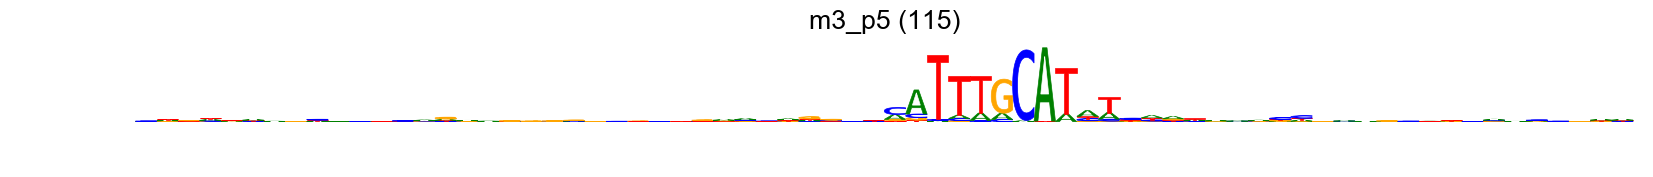

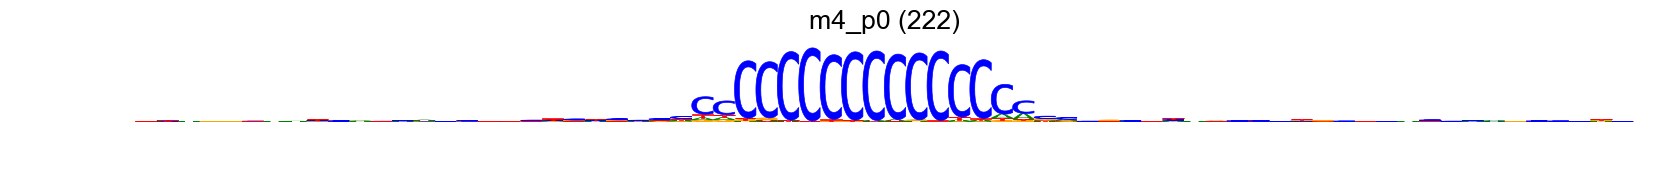

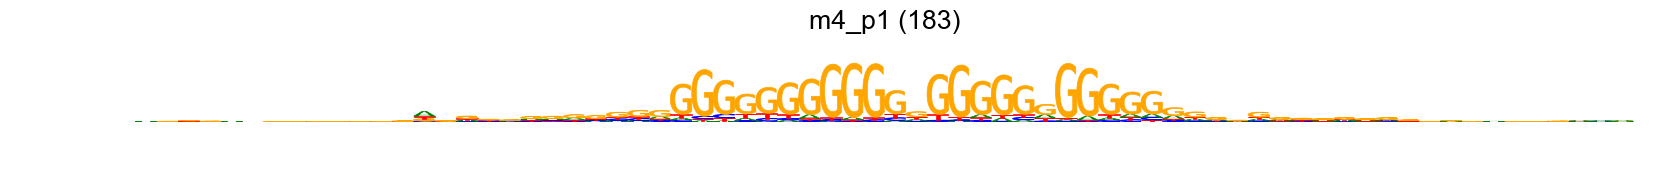

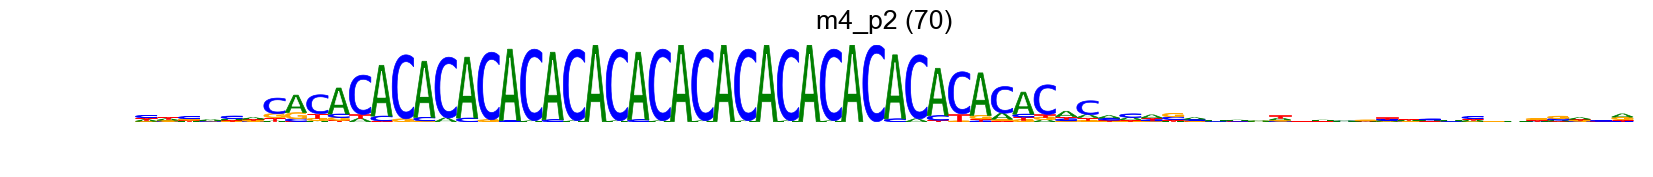

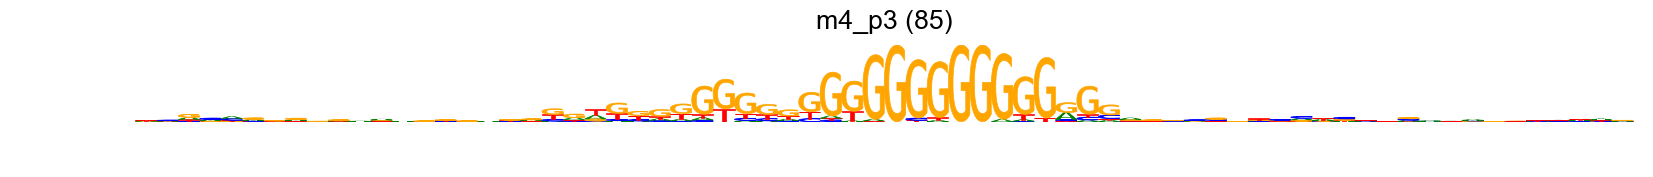

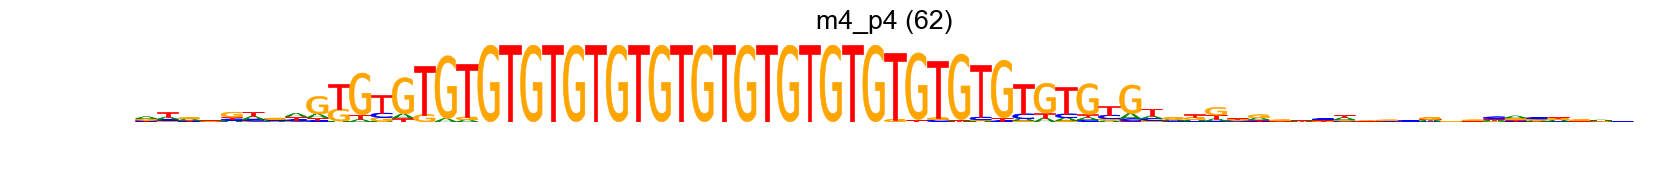

In [88]:
mf.plot_all_patterns(trim_frac=0, letter_width=0.14, height=0.5, ylim=[0, 2], no_axis=True)

## Important tasks per metacluster

In [89]:
mc_stat = mf.metacluster_stats()

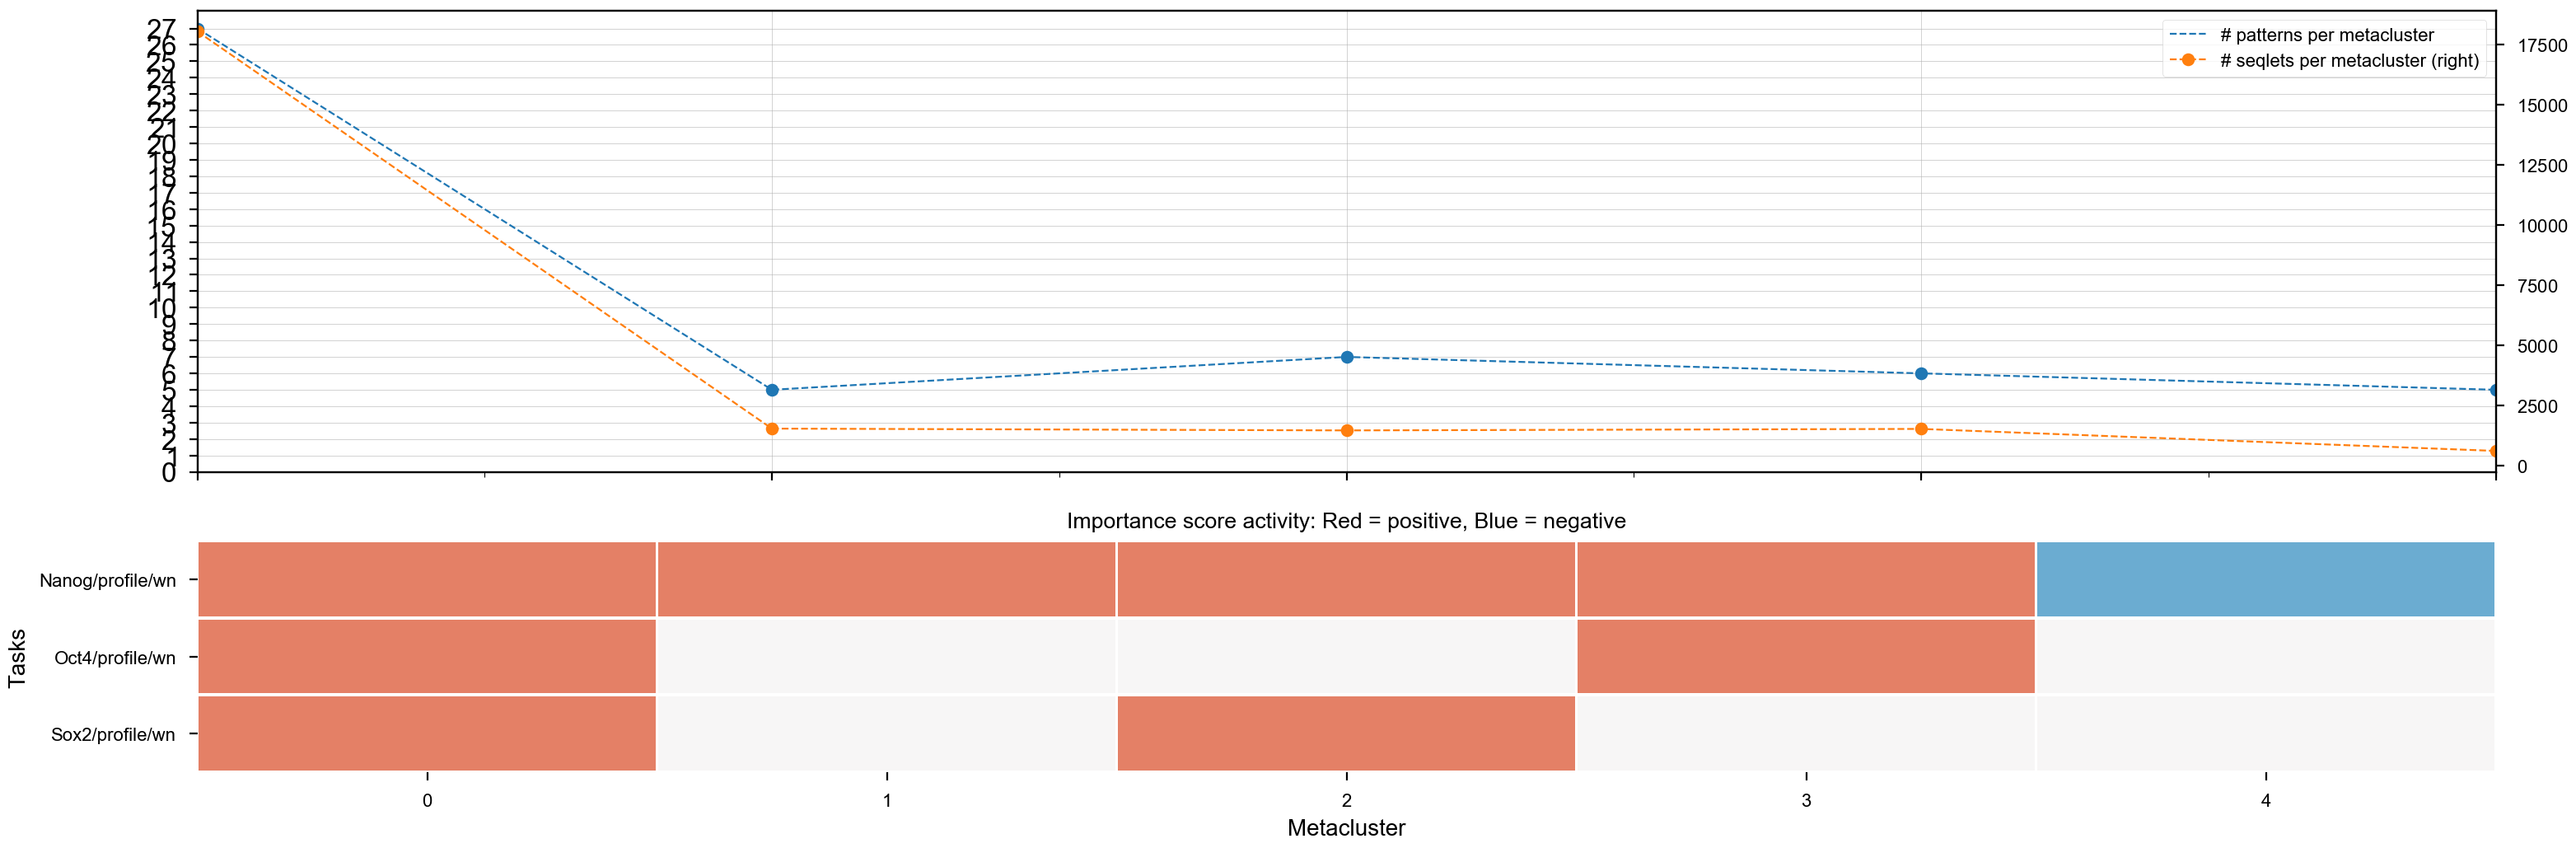

In [90]:
mcs_grouped = mc_stat.groupby("metacluster").n.agg(["count", "sum"]).reset_index()
if len(mc_stat) > 0 and not mcs_grouped['count'].isnull().any():
    fig, ax = plt.subplots(2, 1, sharex=False, figsize=(18,6), 
                           gridspec_kw={'height_ratios': [2,1]})
    mcs_grouped.plot("metacluster", "count", 
                     label="# patterns per metacluster", style="o--", 
                     ax=ax[0], 
                     yticks=range(int(mcs_grouped['count'].max()+1)),
                     xticks=range(38),
                     fontsize='large',
                     xlim=(-.5, len(mf.metaclusters()) - .5 ))
    mcs_grouped.plot("metacluster", "sum", 
                     label="# seqlets per metacluster", 
                     style="o--", ax=ax[0], secondary_y=True)
    ax[0].grid(linewidth=0.2)
    mf.plot_metacluster_activity(ax[1], cbar=False)
    ax[1].set_title("Importance score activity: Red = positive, Blue = negative");
else:
    print("Some counts were none")

In [ ]:
print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(mf.f.f['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(mf.f.f['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0);